# Self lensing simulations

In [1]:
%load_ext autoreload
%autoreload 1

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from timeit import default_timer as timer

%aimport transfer_matrix
%aimport simulator
%aimport survey

matplotlib.rcParams['font.size'] = 16

Create a new simulator object (automatically load the default matrix into memory). 

In [2]:
sim = simulator.Simulator()

Show the resulting light surface for two cases:
- The lens is inside the source area.
- The lens is outside the source area. 

1.6350766895025193

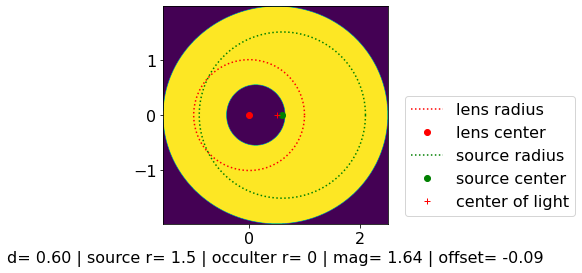

In [3]:
transfer_matrix.single_geometry(source_radius=1.5, distance=0.6, occulter_radius=0, plotting=True)

1.047038676632255

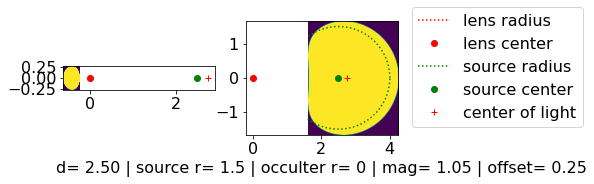

In [4]:
transfer_matrix.single_geometry(source_radius=1.5, distance=2.5, occulter_radius=0, plotting=True)

Compare the direct calculation with the interpolation from the matrix. Note the runtime difference. 

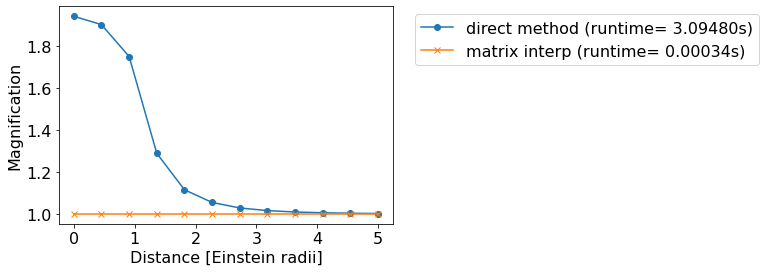

In [5]:
d = np.linspace(0,5,12)
source=1.2

t0 = timer()
mag1 = transfer_matrix.radial_lightcurve(distances=d, source_radius=source)
t1 = timer() - t0

t0 = timer()
mat = sim.choose_matrix(source)
mag2 = mat.radial_lightcurve(distances=d, source=source)
t2 = timer() - t0

plt.plot(d, mag1, '-o', label=f'direct method (runtime= {t1:4.5f}s)')
plt.plot(d, mag2, '-x', label=f'matrix interp (runtime= {t2:4.5f}s)')
plt.xlabel('Distance [Einstein radii]')
plt.ylabel('Magnification')
plt.legend(bbox_to_anchor=(1.04, 1.0), loc="upper left")
plt.show()

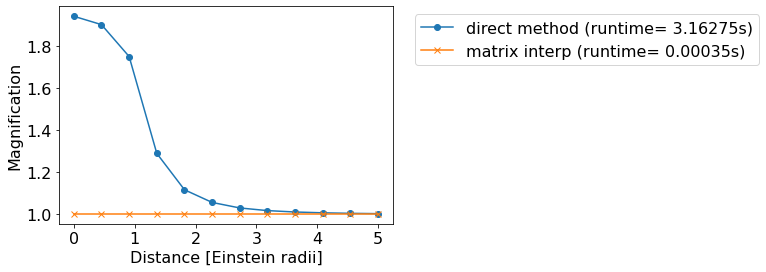

In [336]:
d = np.linspace(0,5,12)
source = 1.2
occulter = 0.2

t0 = timer()
mag1 = transfer_matrix.radial_lightcurve(distances=d, source_radius=source, occulter_radius=occulter)
t1 = timer() - t0

t0 = timer()
mat = sim.choose_matrix(source)
mag2 = mat.radial_lightcurve(distances=d, source=source, occulter_radius=occulter)
t2 = timer() - t0

plt.plot(d, mag1, '-o', label=f'direct method (runtime= {t1:4.5f}s)')
plt.plot(d, mag2, '-x', label=f'matrix interp (runtime= {t2:4.5f}s)')
plt.xlabel('Distance [Einstein radii]')
plt.ylabel('Magnification')
plt.legend(bbox_to_anchor=(1.04, 1.0), loc="upper left")
plt.show()

Input physical parameters to the simulator and get proper lightcurves. 

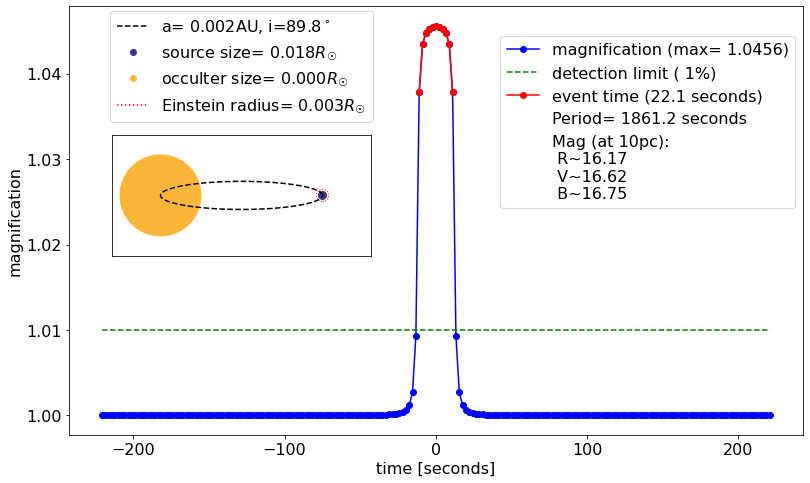

In [14]:
sim = simulator.Simulator()
sim.input_system(star_type='WD', star_mass=0.3, star_temp=5000, 
                lens_type='NS', lens_mass=2.0,
                inclination=89.8, semimajor_axis=0.002,
                time_units='seconds')

# plt.plot(sim.timestamps, sim.magnifications)
syst = sim.output_system()
fig = plt.figure(figsize=[12, 7])
syst.plot(fig=fig)

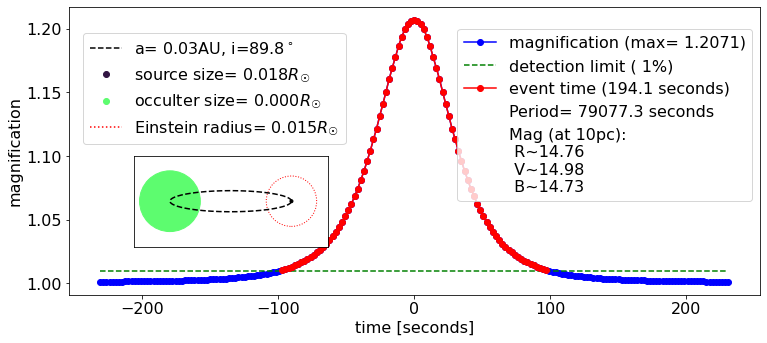

In [300]:
sim = simulator.Simulator()
sim.input_system(star_type='WD', star_mass=0.3, star_temp=7000, 
                lens_type='BH', lens_mass=4.0,
                inclination=89.8, semimajor_axis=0.03,
                time_units='seconds')

# plt.plot(sim.timestamps, sim.magnifications)
syst = sim.output_system()
syst.plot()

occulter_size= 0.34132235435359476 | matrix.max_occulter= 5.0


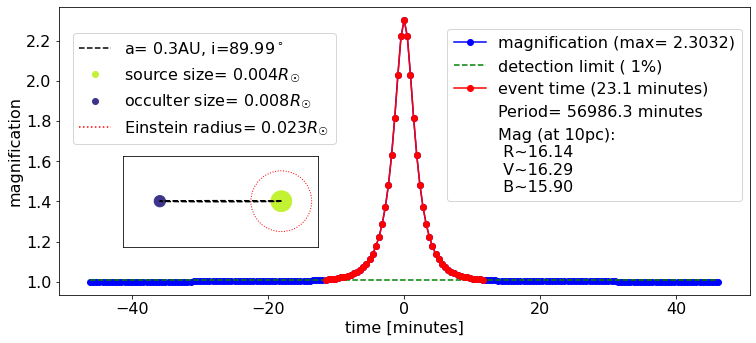

In [318]:
sim = simulator.Simulator()
sim.input_system(star_type='WD', star_mass=1.3, star_temp=10000, 
                lens_type='WD', lens_mass=1.0, lens_temp=6000, 
                inclination=89.99, semimajor_axis=0.3,
                time_units='minutes')

# plt.plot(sim.timestamps, sim.magnifications)
syst = sim.output_system()
syst.plot()

In [322]:
sim.source_size

0.1857875804373651

In [326]:
sim.matrices[1].min_source

0.1

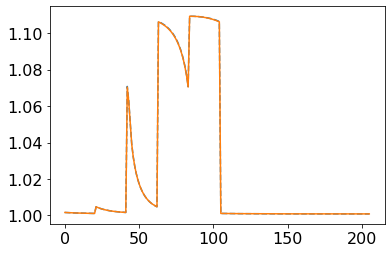

In [334]:
plt.plot(sim.matrices[2].radial_lightcurve(source=4.185, occulter_radius=0.0), '--')
plt.plot(sim.matrices[2].radial_lightcurve(source=4.185, occulter_radius=0.2))